## Telecom Churn Case Study
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

### Importing and Merging Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [3]:
# Importing all datasets
churn_data = pd.read_csv("churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customer_data = pd.read_csv("customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
internet_data = pd.read_csv("internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


#### Combining all data files into one consolidated dataframe

In [6]:
# Merging on 'customerID'
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [7]:
# Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

### Inspecting the Dataframe

In [8]:
# Let's see the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [9]:
# Let's check the dimensions of the dataframe
telecom.shape

(7043, 21)

In [10]:
# let's look at the statistical aspects of the dataframe
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [11]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


### Data Preparation

#### Converting some binary variables (Yes/No) to 0/1 (DUMMY CREATION)

In [12]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [13]:
# List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
telecom[varlist] = telecom[varlist].apply(binary_map)

In [14]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [15]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, dummy1], axis=1)

In [16]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,0,0,0,1,0,0,1,0


In [17]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

In [18]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


In [19]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [20]:
#The varaible was imported as a string we need to convert it to float
telecom["MonthlyCharges"] = telecom["MonthlyCharges"].astype('float')

In [21]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   object 
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [22]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [23]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
90%,69.000000,102.600000,1.000000
95%,72.000000,107.400000,1.000000
99%,72.000000,114.729000,1.000000


In [24]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBacku

In [25]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

## Splitting the data into test-train

In [26]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = telecom.drop(['Churn','customerID'], axis=1)

X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.5,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [27]:
# Putting response variable to y
y = telecom['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [28]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 877 to 5640
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 4930 non-null   int64  
 1   PhoneService                           4930 non-null   int64  
 2   PaperlessBilling                       4930 non-null   int64  
 3   MonthlyCharges                         4930 non-null   float64
 4   TotalCharges                           4930 non-null   object 
 5   SeniorCitizen                          4930 non-null   int64  
 6   Partner                                4930 non-null   int64  
 7   Dependents                             4930 non-null   int64  
 8   Contract_One year                      4930 non-null   uint8  
 9   Contract_Two year                      4930 non-null   uint8  
 10  PaymentMethod_Credit card (automatic)  4930 non-null   uint8  
 11  Pa

In [30]:
# X_train.TotalCharges.value_counts()
X_train.TotalCharges=pd.to_numeric(X_train.TotalCharges, errors='coerce').fillna(0, downcast='infer')

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
877,0.754422,0,0,-0.145568,0.350963,0,0,1,1,0,...,1,0,0,1,0,1,0,1,0,1
5792,-0.710751,1,1,1.051796,-0.377957,1,0,0,0,0,...,1,0,0,1,0,1,1,0,0,1
5334,0.673024,1,1,1.437668,1.329866,0,1,1,0,1,...,0,1,0,1,0,1,0,1,0,1
878,1.120716,1,0,0.006794,0.776103,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
6578,-0.914247,1,0,0.298268,-0.701925,0,0,1,1,0,...,1,0,0,1,0,1,1,0,0,1


In [32]:
### Checking the Churn Rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.536987079369588

## Visualizing the Data

In [33]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Let's see the correlation matrix

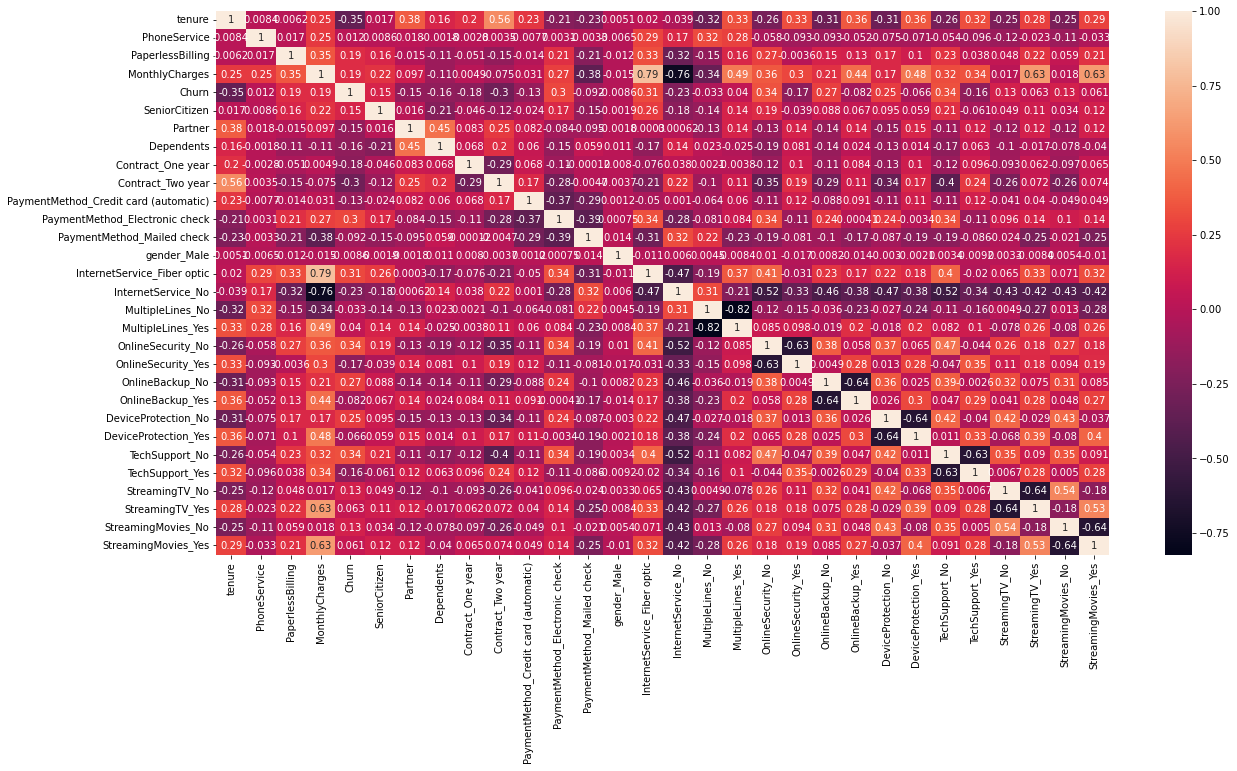

In [34]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)
plt.show()

In [35]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)

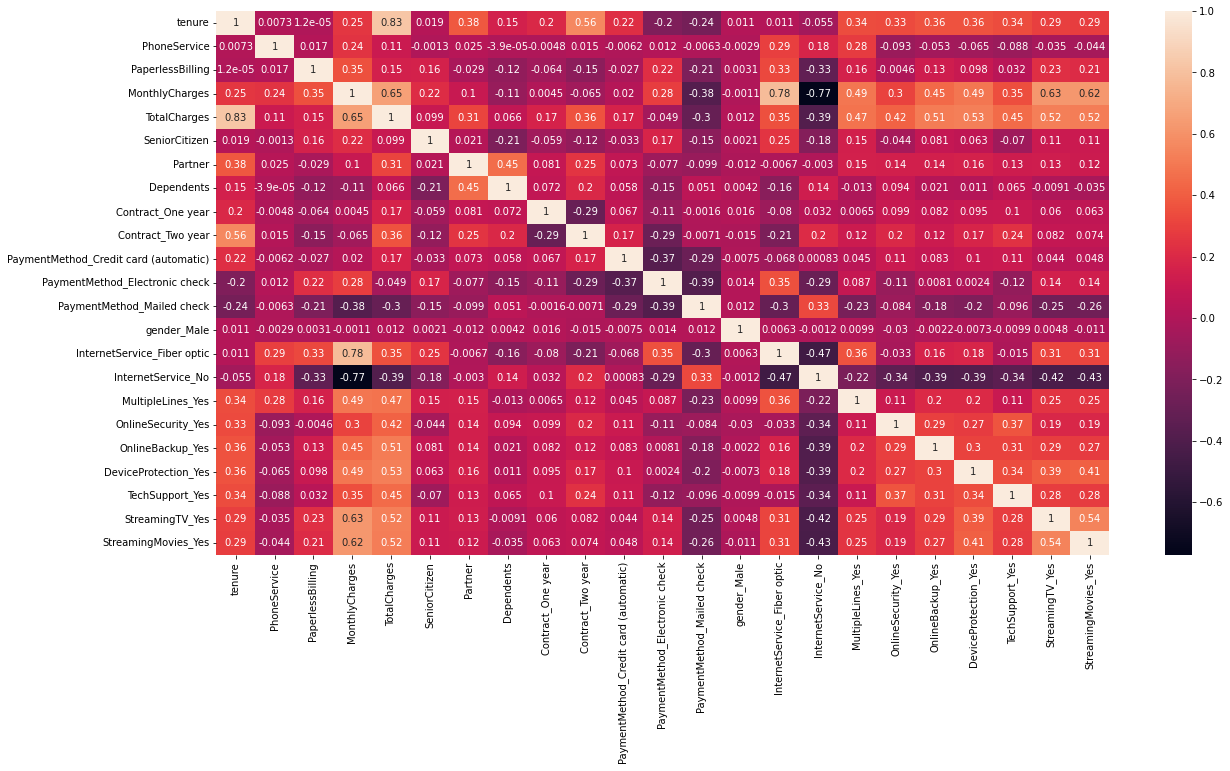

In [36]:
from matplotlib import pyplot as plt
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

## Modelling the data

In [37]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2008.0
Date:                Thu, 06 Oct 2022   Deviance:                       4016.1
Time:                        16:12:36   Pearson chi2:                 5.77e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.9889      1.532     -1.952      0.051      -5.991       0.013
tenure                                   -1.3441      0.179     -7.500      0.000      -1.695      -0.993
PhoneService                              0.4097      0.786      0.521      0.602      -1.131       1.950
PaperlessBilling                          0.3453      0.090      3.828      0.000       0.169       0.522
MonthlyCharges                           -1.5336      1.162     -1.320      0.187      -3.812       0.744
TotalCharges                              0.6103      0.190      3.215      0.001       0.238       0.982
SeniorCitizen                             0.2950      0.103      2.877      0.004       0.094       0.496
Partner                                   0.0272      0.094      0.289      0.772      -0.157       0.212
Dependents                               -0.2207      0.108     -2.049      0.040      -0.432      -0.010
Contract_One year                        -0.6736      0.129     -5.205      0.000      -0.927      -0.420
Contract_Two year                        -1.3372      0.207     -6.452      0.000      -1.743      -0.931
PaymentMethod_Credit card (automatic)    -0.1531      0.138     -1.108      0.268      -0.424       0.118
PaymentMethod_Electronic check            0.2733      0.114      2.396      0.017       0.050       0.497
PaymentMethod_Mailed check               -0.0916      0.139     -0.660      0.509      -0.364       0.180
gender_Male                              -0.0411      0.078     -0.525      0.600      -0.195       0.112
InternetService_Fiber optic               2.0221      0.967      2.091      0.037       0.127       3.917
InternetService_No                       -2.1794      0.977     -2.231      0.026      -4.094      -0.264
MultipleLines_Yes                         0.5539      0.215      2.577      0.010       0.133       0.975
OnlineSecurity_Yes                       -0.0429      0.217     -0.198      0.843      -0.467       0.382
OnlineBackup_Yes                         -0.0206      0.211     -0.097      0.922      -0.435       0.394
DeviceProtection_Yes                      0.2014      0.213      0.944      0.345      -0.217       0.620
TechSupport_Yes                          -0.2538      0.219     -1.159      0.247      -0.683       0.175
StreamingTV_Yes                           0.7001      0.397      1.764      0.078      -0.078       1.478
StreamingMovies_Yes                       0.6689      0.396      1.688      0.091      -0.108       1.445
=========================================================================================================
"""

#### Using sklearn for simple logistic modelling

In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [39]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [40]:
rfe.support_

array([ True,  True,  True, False,  True,  True, False, False,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
        True, False,  True,  True, False])

### Generating a list of RFE-selected characteristics

In [41]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 8),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 9),
 ('Dependents', False, 2),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 4),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 5),
 ('gender_Male', False, 7),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', True, 1),
 ('DeviceProtection_Yes', False, 6),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', False, 3)]

#### RFE-selected features list during feature selection

In [42]:
col = X_train.columns[rfe.support_]
df1 = pd.DataFrame(col)
df1.rename(columns = {0 : 'Features'}, inplace = True)
df1

,Features
0,tenure
1,PhoneService
2,PaperlessBilling
3,TotalCharges
4,SeniorCitizen
5,Contract_One year
6,Contract_Two year
7,PaymentMethod_Electronic check
8,InternetService_Fiber optic
9,InternetService_No


#### RFE-rejected feature list during feature selection

In [43]:
df2 = pd.DataFrame(X_train.columns[rfe.support_])
df2.rename(columns = {0 : 'Features'}, inplace = True)
df2

,Features
0,tenure
1,PhoneService
2,PaperlessBilling
3,TotalCharges
4,SeniorCitizen
5,Contract_One year
6,Contract_Two year
7,PaymentMethod_Electronic check
8,InternetService_Fiber optic
9,InternetService_No


## Model 1
- Adding a constant variable to above dataset because statsmodel excludes const
- Running the linear model

In [44]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4914
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2013.5
Date:                Thu, 06 Oct 2022   Deviance:                       4027.0
Time:                        16:12:36   Pearson chi2:                 5.86e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.0907      0.170     -6.405      0.000      -1.424      -0.757
tenure                            -1.3766      0.174     -7.919      0.000      -1.717      -1.036
PhoneService                      -0.6310      0.158     -3.989      0.000      -0.941      -0.321
PaperlessBilling                   0.3610      0.090      4.020      0.000       0.185       0.537
TotalCharges                       0.6560      0.182      3.604      0.000       0.299       1.013
SeniorCitizen                      0.3323      0.100      3.307      0.001       0.135       0.529
Contract_One year                 -0.6847      0.128     -5.335      0.000      -0.936      -0.433
Contract_Two year                 -1.3542      0.206     -6.564      0.000      -1.759      -0.950
PaymentMethod_Electronic check     0.3638      0.083      4.365      0.000       0.200       0.527
InternetService_Fiber optic        0.7711      0.119      6.495      0.000       0.538       1.004
InternetService_No                -0.9344      0.164     -5.714      0.000      -1.255      -0.614
MultipleLines_Yes                  0.3001      0.096      3.130      0.002       0.112       0.488
OnlineSecurity_Yes                -0.3070      0.102     -3.018      0.003      -0.506      -0.108
OnlineBackup_Yes                  -0.2801      0.093     -3.015      0.003      -0.462      -0.098
TechSupport_Yes                   -0.5067      0.104     -4.877      0.000      -0.710      -0.303
StreamingTV_Yes                    0.2265      0.095      2.386      0.017       0.040       0.412
==================================================================================================
"""

### Getting the predicted values on the train set

In [45]:
y_train_pred = res.predict(X_train_sm)
pd.DataFrame(y_train_pred[:10])

,0
877,0.040274
5792,0.415665
5334,0.094647
878,0.026862
6578,0.106983
3090,0.495655
3043,0.737799
5028,0.042510
4463,0.710087
2822,0.063494


In [46]:
y_train_pred = y_train_pred.values.reshape(-1)
pd.DataFrame(y_train_pred[:10])

,0
0,0.040274
1,0.415665
2,0.094647
3,0.026862
4,0.106983
5,0.495655
6,0.737799
7,0.042510
8,0.710087
9,0.063494


#### Checking churn probabilities

In [47]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.040274,877
1,1,0.415665,5792
2,1,0.094647,5334
3,0,0.026862,878
4,0,0.106983,6578


#### Checking churn probabilities vs predicted

In [48]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.040274,877,0
1,1,0.415665,5792,0
2,1,0.094647,5334,0
3,0,0.026862,878,0
4,0,0.106983,6578,0


## Let's look at the confusion matrix
Using sklearn.metrics

In [49]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[3255  372]
 [ 550  753]]


In [50]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

#### Let's check the overall accuracy.

In [51]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8129817444219067


#### Check for the VIF values of the feature variables. 

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Checking the VIF obtained from features received from the above model

In [53]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,PhoneService,9.14
3,TotalCharges,7.62
0,tenure,6.47
8,InternetService_Fiber optic,4.07
9,InternetService_No,3.32
6,Contract_Two year,3.24
2,PaperlessBilling,2.75
10,MultipleLines_Yes,2.52
14,StreamingTV_Yes,2.43
12,OnlineBackup_Yes,2.08


## Model 2
- Create a dataframe that will contain the names of all the feature variables and their respective VIFs
- Let's drop <b>PhoneService</b> since it has a high VIF

In [54]:
col = col.drop('PhoneService', 1)
pd.DataFrame(col)

,0
0,tenure
1,PaperlessBilling
2,TotalCharges
3,SeniorCitizen
4,Contract_One year
5,Contract_Two year
6,PaymentMethod_Electronic check
7,InternetService_Fiber optic
8,InternetService_No
9,MultipleLines_Yes


#### Let's re-run the model using the selected variables

In [55]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4915
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2021.4
Date:                Thu, 06 Oct 2022   Deviance:                       4042.8
Time:                        16:12:36   Pearson chi2:                 5.61e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.5099      0.135    -11.146      0.000      -1.775      -1.244
tenure                            -1.2417      0.170     -7.288      0.000      -1.576      -0.908
PaperlessBilling                   0.3600      0.089      4.023      0.000       0.185       0.535
TotalCharges                       0.5282      0.179      2.945      0.003       0.177       0.880
SeniorCitizen                      0.3573      0.100      3.565      0.000       0.161       0.554
Contract_One year                 -0.6989      0.128     -5.456      0.000      -0.950      -0.448
Contract_Two year                 -1.3560      0.206     -6.581      0.000      -1.760      -0.952
PaymentMethod_Electronic check     0.3739      0.083      4.497      0.000       0.211       0.537
InternetService_Fiber optic        0.6125      0.110      5.554      0.000       0.396       0.829
InternetService_No                -1.1313      0.155     -7.316      0.000      -1.434      -0.828
MultipleLines_Yes                  0.2371      0.094      2.530      0.011       0.053       0.421
OnlineSecurity_Yes                -0.3206      0.101     -3.159      0.002      -0.520      -0.122
OnlineBackup_Yes                  -0.2663      0.093     -2.873      0.004      -0.448      -0.085
TechSupport_Yes                   -0.5183      0.104     -4.999      0.000      -0.722      -0.315
StreamingTV_Yes                    0.2643      0.094      2.799      0.005       0.079       0.449
==================================================================================================
"""

In [56]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.02833813, 0.41674847, 0.09031836, 0.03172591, 0.11444089,
       0.54597558, 0.64716806, 0.04261177, 0.71305632, 0.07136586])

In [57]:
y_train_pred_final['Churn_Prob'] = y_train_pred

#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0


In [58]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.028338,877,0
1,1,0.416748,5792,0
2,1,0.090318,5334,0
3,0,0.031726,878,0
4,0,0.114441,6578,0


#### Let's check the overall accuracy.

In [59]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8121703853955375


#### Check for the VIF values of the feature variables. 

In [60]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,TotalCharges,7.53
0,tenure,6.36
7,InternetService_Fiber optic,3.15
5,Contract_Two year,3.09
1,PaperlessBilling,2.62
13,StreamingTV_Yes,2.41
8,InternetService_No,2.31
9,MultipleLines_Yes,2.28
11,OnlineBackup_Yes,2.02
12,TechSupport_Yes,1.98


## Model 3
- Let's drop <b>TotalCharges</b> since it has a high VIF

#### Let's drop TotalCharges since it has a high VIF

In [61]:
col = col.drop('TotalCharges')
pd.DataFrame(col)

,0
0,tenure
1,PaperlessBilling
2,SeniorCitizen
3,Contract_One year
4,Contract_Two year
5,PaymentMethod_Electronic check
6,InternetService_Fiber optic
7,InternetService_No
8,MultipleLines_Yes
9,OnlineSecurity_Yes


#### Let's re-run the model using the selected variables

In [62]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4916
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.9
Date:                Thu, 06 Oct 2022   Deviance:                       4051.9
Time:                        16:12:37   Pearson chi2:                 5.12e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.6007      0.131    -12.189      0.000      -1.858      -1.343
tenure                            -0.7883      0.066    -11.953      0.000      -0.918      -0.659
PaperlessBilling                   0.3558      0.089      3.982      0.000       0.181       0.531
SeniorCitizen                      0.3595      0.101      3.574      0.000       0.162       0.557
Contract_One year                 -0.6885      0.127     -5.409      0.000      -0.938      -0.439
Contract_Two year                 -1.3302      0.204     -6.510      0.000      -1.731      -0.930
PaymentMethod_Electronic check     0.3670      0.083      4.406      0.000       0.204       0.530
InternetService_Fiber optic        0.7660      0.097      7.892      0.000       0.576       0.956
InternetService_No                -1.1347      0.154     -7.359      0.000      -1.437      -0.832
MultipleLines_Yes                  0.2858      0.092      3.108      0.002       0.106       0.466
OnlineSecurity_Yes                -0.2838      0.101     -2.813      0.005      -0.481      -0.086
OnlineBackup_Yes                  -0.2225      0.092     -2.430      0.015      -0.402      -0.043
TechSupport_Yes                   -0.4737      0.103     -4.612      0.000      -0.675      -0.272
StreamingTV_Yes                    0.3479      0.090      3.861      0.000       0.171       0.524
==================================================================================================
"""